# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coos bay
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | freetown
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | dingcheng
Processing Record 10 of Set 1 | bonnyville
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | devinuwara
City not found. Skipping...
'coord'
Processing Record 13 of Set 1 | haikou
Processing Record 14 of Set 1 | kapuskasing
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | pagar alam
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | vernon
Processing Record 19 of Set 1 | palmer
Processing Record 20 of Set 1 | bonthe
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coos bay,43.3665,-124.2179,298.74,72,0,4.63,US,1721345352
1,vadso,70.0744,29.7487,285.64,93,100,9.26,NO,1721345353
2,hamilton,39.1834,-84.5333,299.20,55,0,2.24,US,1721345196
3,guerrero negro,27.9769,-114.0611,296.20,65,0,7.19,MX,1721345058
4,yellowknife,62.4560,-114.3525,298.44,50,75,7.20,CA,1721345099


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coos bay,43.3665,-124.2179,298.74,72,0,4.63,US,1721345352
1,vadso,70.0744,29.7487,285.64,93,100,9.26,NO,1721345353
2,hamilton,39.1834,-84.5333,299.20,55,0,2.24,US,1721345196
3,guerrero negro,27.9769,-114.0611,296.20,65,0,7.19,MX,1721345058
4,yellowknife,62.4560,-114.3525,298.44,50,75,7.20,CA,1721345099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

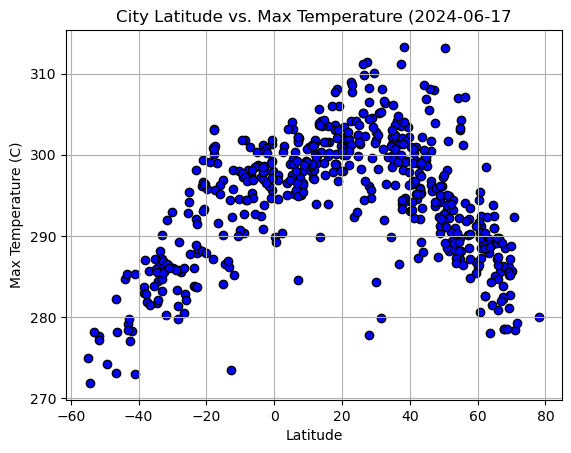

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-06-17')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

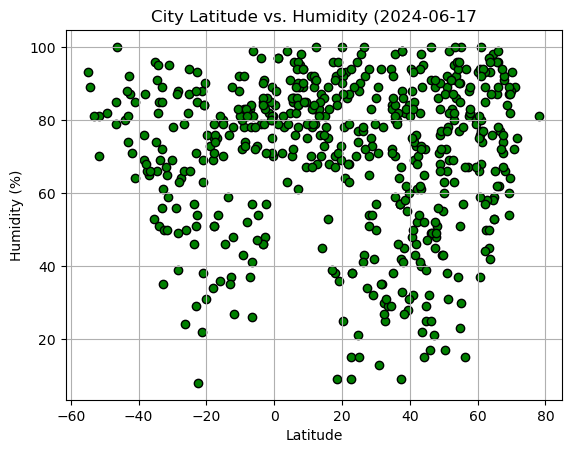

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

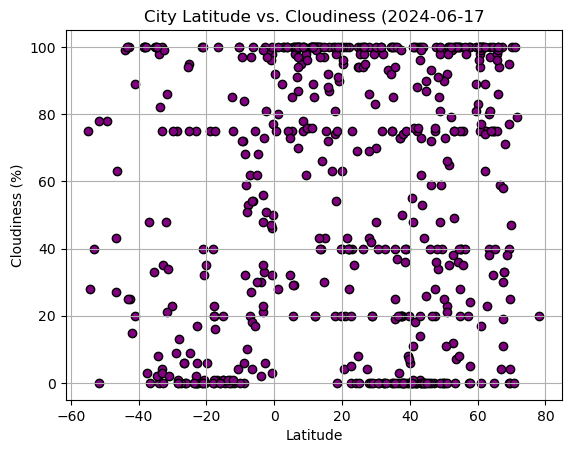

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="purple", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

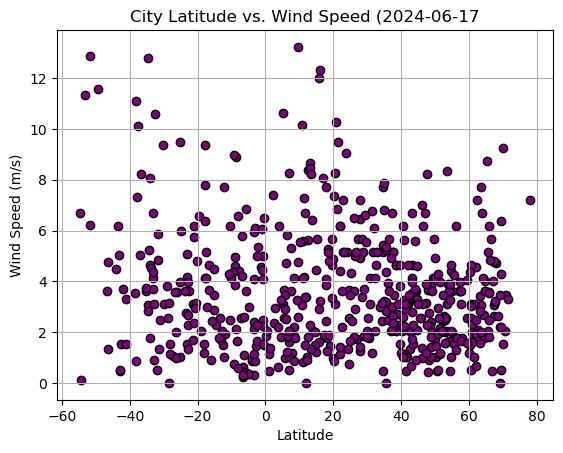

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="purple", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = np.array(x_values) * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    return {
        'slope': slope,
        'intercept': intercept,
        'rvalue': rvalue,
        'pvalue': pvalue,
        'stderr': stderr,
        'regress_values': regress_values,
        'line_eq': line_eq
    }

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coos bay,43.3665,-124.2179,298.74,72,0,4.63,US,1721345352
1,vadso,70.0744,29.7487,285.64,93,100,9.26,NO,1721345353
2,hamilton,39.1834,-84.5333,299.20,55,0,2.24,US,1721345196
3,guerrero negro,27.9769,-114.0611,296.20,65,0,7.19,MX,1721345058
4,yellowknife,62.4560,-114.3525,298.44,50,75,7.20,CA,1721345099


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,avarua,-21.2078,-159.7750,296.18,88,100,3.09,CK,1721345157
7,grytviken,-54.2811,-36.5092,271.91,89,28,0.10,GS,1721345086
14,pagar alam,-4.0167,103.2667,292.49,97,30,0.85,ID,1721345369
15,adamstown,-25.0660,-130.1015,295.40,87,95,9.49,PN,1721345088
19,edinburgh of the seven seas,-37.0676,-12.3116,285.65,65,48,5.02,SH,1721345102


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3486874100349065


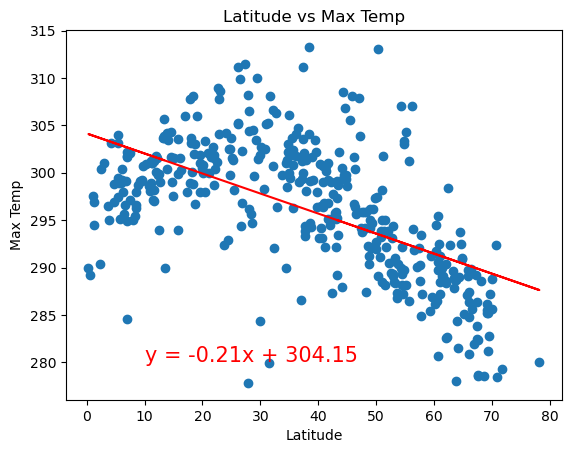

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(10,280),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.show()

The r^2-value is: 0.6575596749198231


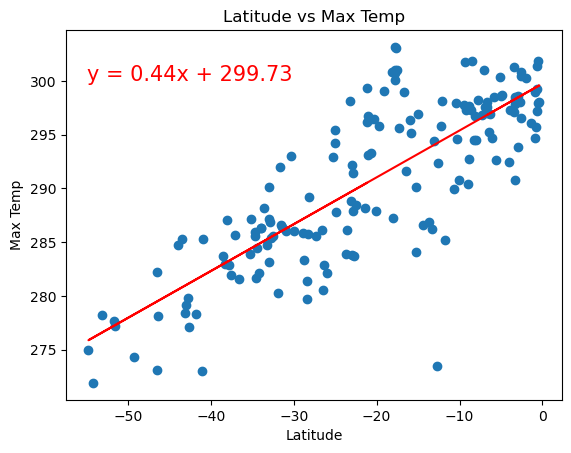

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(-55,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.show()

**Discussion about the linear relationship:** Both graphs show it get warmer toward the equator and colder father away. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.006844780247906502


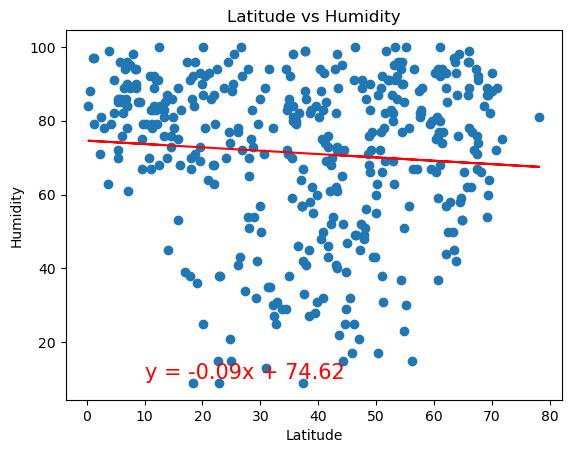

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.show()

The r^2-value is: 0.00564503201290506


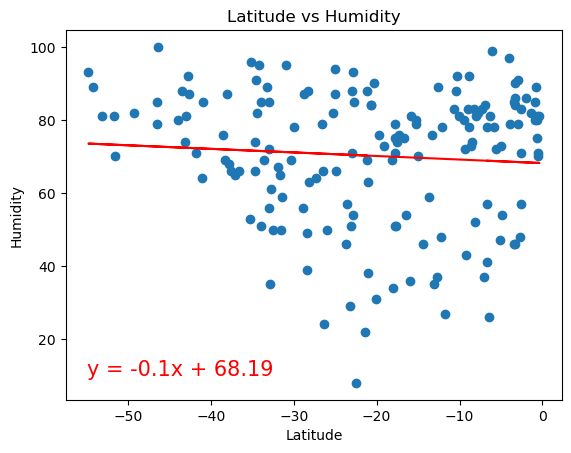

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.show()

**Discussion about the linear relationship:** Humidity seems to get slightly higher the farther away from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03242437696422047


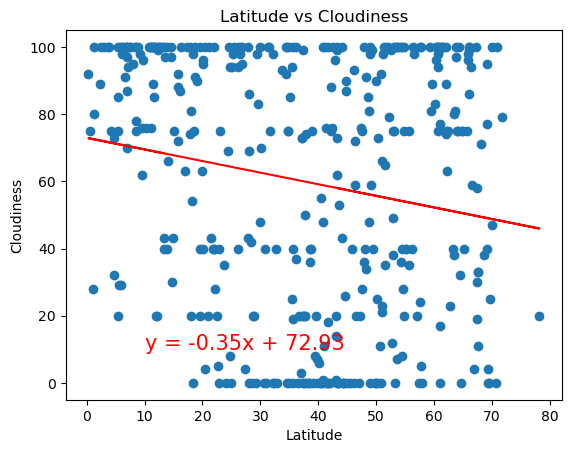

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.show()

The r^2-value is: 0.00013588548221018726


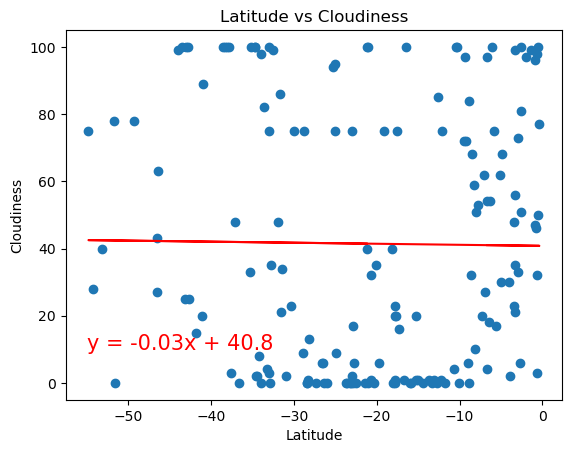

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.show()

**Discussion about the linear relationship:** seems to have a stronger relationship in the northern hemisphere, but it is slightly less cloudy away from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01627867038975315


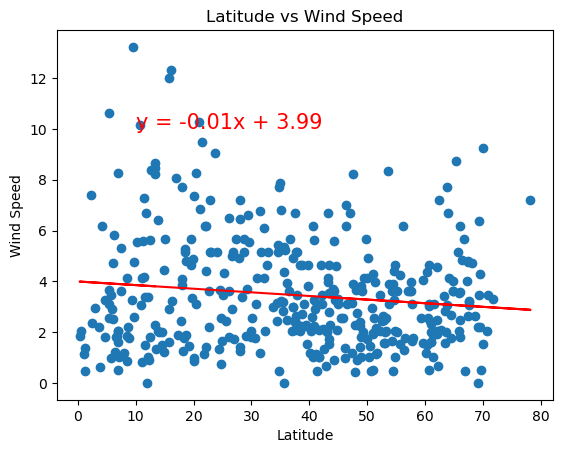

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.show()

The r^2-value is: 0.06662988506521869


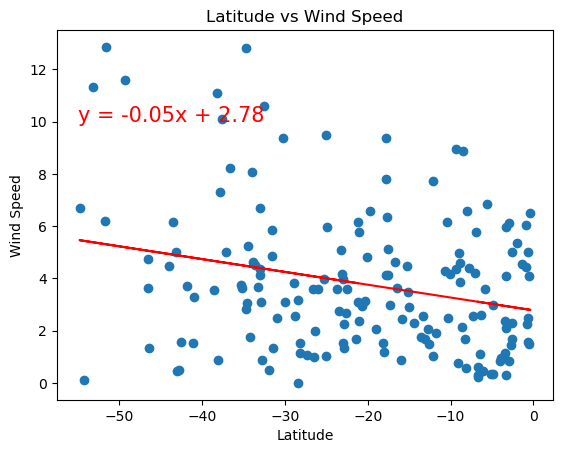

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
results=linear_regression(x_values, y_values)
print(f"The r^2-value is: {results['rvalue']**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,results['regress_values'],"r-")
plt.annotate(results['line_eq'],(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.show()

**Discussion about the linear relationship:** less windy as you go towards the equator which makes since given the duldrums.